In [6]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from tqdm.auto import tqdm

In [7]:
#sys.setrecursionlimit(2000)

In [53]:
class SandPile:
    def __init__(self,l,threshold,maxRecursion):
        self.threshold = threshold
        self.stepAvalanches = None
        self.l  = l
        self.avalanchesData = []
        self.lattice = np.random.randint(0,threshold,(l,l))
        self.walks = [(1,1),(1,-1),(-1,1),(-1,-1)]
        self.max = maxRecursion
        self.n = np.sum(self.lattice)

    def run(self,count):
        self.avalanchesData = np.zeros(count)

        for i in tqdm(range(count)):
            self.step()
            self.avalanchesData[i] = self.stepAvalanches

            

    def step(self):
        self.stepAvalanches = 0
        i,j = np.random.randint(0,self.l,2)
        self.check(i,j)


    def check(self,i,j):
        self.stepAvalanches += 1
        if self.stepAvalanches > self.max: return 0 

        match self.lattice[i,j] :
         #case bigger than 1    
            case 0:
                self.lattice[i,j] += 1
                self.n += 1
                

            case  1:
                self.lattice[i,j] = 0

                walkIndex1,walkIndex2 = np.random.choice([0,1,2,3],2,replace=True)
                    
                i1 = i + self.walks[walkIndex1][0]
                j1 = j + self.walks[walkIndex1][1]
                    
                i2 = i + self.walks[walkIndex2][0]
                j2 = j + self.walks[walkIndex2][1]

                if 0<=i1<self.l and 0<=j1<self.l :
                    self.check(i1,j1)
                    
                if 0<=i2<self.l and 0<=j2<self.l :
                    self.check(i2,j2)
            case _: 
                print("shit")
            
    
    def getHist(self):
        sortedValues = list(set(self.avalanchesData))
        sortedValues.sort()
        counts = np.zeros(len(sortedValues))
        for i in range(len(sortedValues)):
            counts[i] = list(self.avalanchesData).count(sortedValues[i])

        return [counts,sortedValues]
            


In [56]:
s = SandPile(256,2,2000)

In [57]:
s.run(10000)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [58]:
counts , sizes = s.getHist()

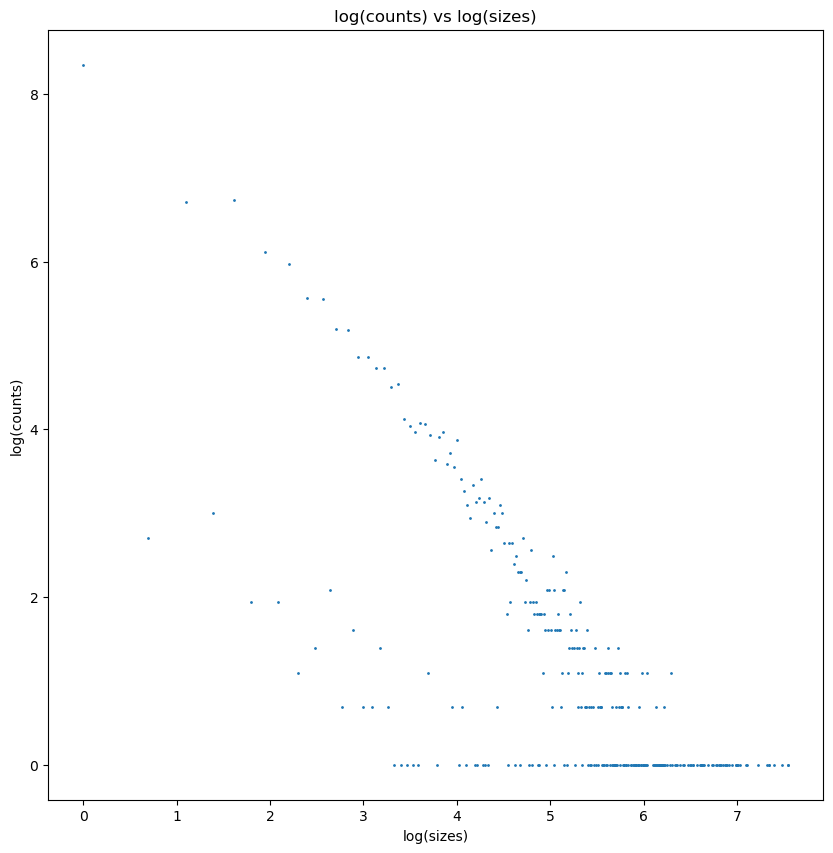

In [59]:
index = 1000
plt.figure(figsize=(10,10))
plt.title("log(counts) vs log(sizes)")
plt.xlabel("log(sizes)")
plt.ylabel("log(counts)")
plt.scatter(np.log(sizes[:index]),np.log(counts[:index]),s=1)

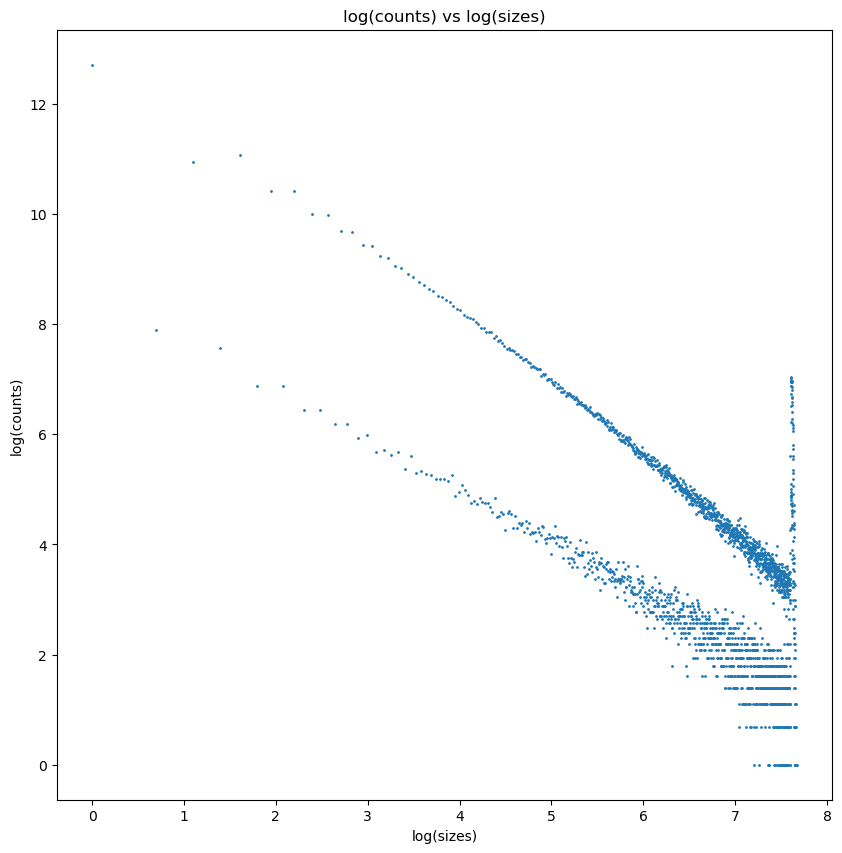

In [14]:
plt.figure(figsize=(10,10))
plt.title("log(counts) vs log(sizes)")
plt.xlabel("log(sizes)")
plt.ylabel("log(counts)")
plt.scatter(np.log(sizes),np.log(counts),s=1)

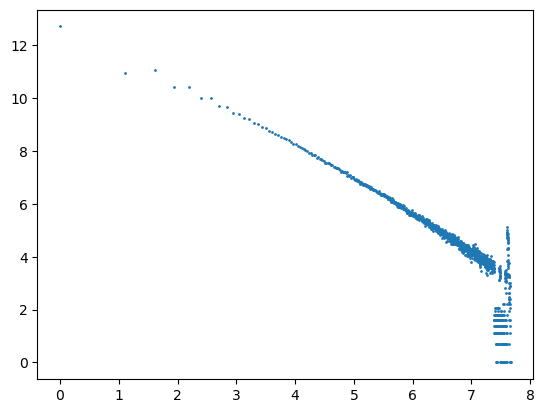

In [17]:
plt.scatter(np.log(sizes[::2]),np.log(counts[::2]),s=1)

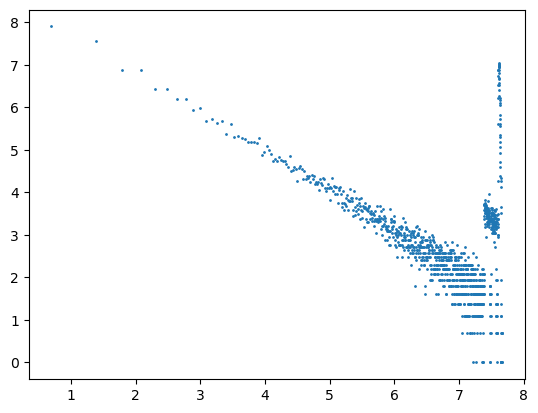

In [18]:
plt.scatter(np.log(sizes[1::2]),np.log(counts[1::2]),s=1)

In [45]:
index = 1000

In [46]:
m1,b1 = np.polyfit(np.log(sizes[:index:2]),np.log(counts[:index:2]),1)

In [47]:
m2,b2 = np.polyfit(np.log(sizes[1:index:2]),np.log(counts[1:index:2]),1)

In [48]:
len(counts)

2113

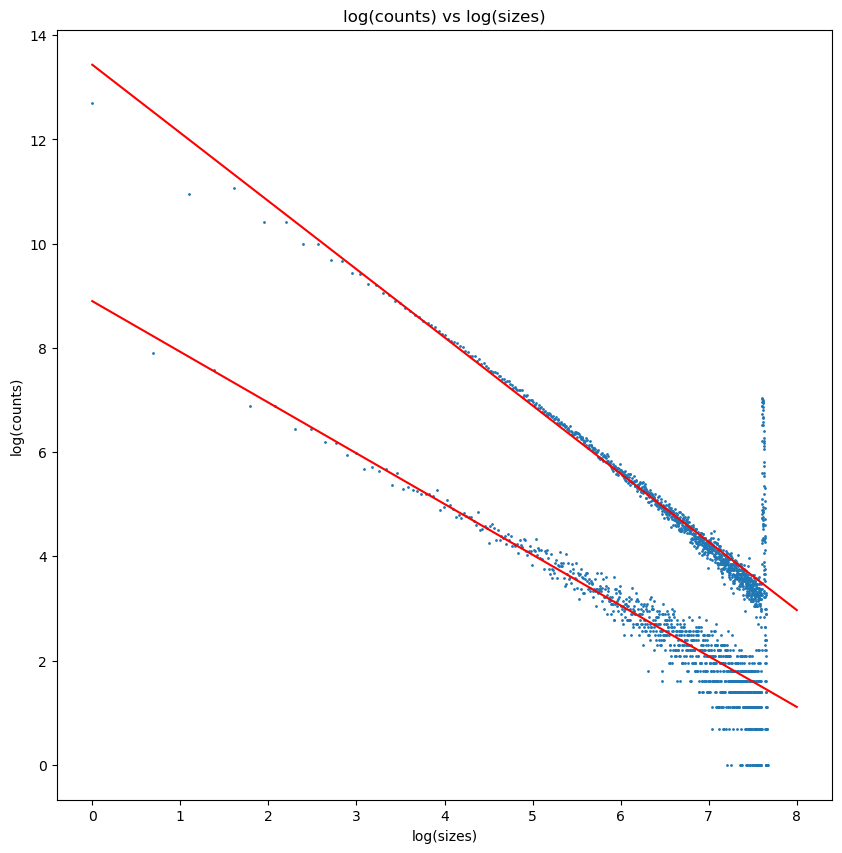

In [49]:
plt.figure(figsize=(10,10))
plt.title("log(counts) vs log(sizes)")
plt.xlabel("log(sizes)")
plt.ylabel("log(counts)")
plt.scatter(np.log(sizes),np.log(counts),s=1)
plt.plot()
plt.plot([0,8],[b1,b1+8*m1],c="red")
plt.plot([0,8],[b2,b2+8*m2],c="red")

In [ ]:
# sampling for 10000 iterations 
iterations = 1000
Data = []
for l in [5,10,15,20,25]:
    sandPile = SandPile(l,2)
    sandPile.getData(iterations)
    Data.append(sandPile.getHist())

In [ ]:
values,counts = Data[0]

In [ ]:
counts

In [ ]:
plt.figure(figsize=(10,10))
plt.title("log counts vs log sizes")
plt.xlabel("log(sizes)")
plt.ylabel("log(counts)")

for i in range(5):
    l = [5,10,15,20,25][i]
    counts,values = Data[i]
    counts = np.array(counts)
    counts = counts /iterations
    plt.plot(np.log(values),np.log(counts))

In [ ]:
plt.figure(figsize=(10,10))
plt.title("log counts vs log sizes")
plt.xlabel("log(sizes)")
plt.ylabel("log(counts)")

for i in range(5):
    l = [5,10,15,20,25][i]
    counts,values = Data[i]
    counts = np.array(counts)
    counts = counts / iterations
    values = np.array(values)
    plt.plot(np.log(values/(l**2)),np.log(counts))

In [ ]:
print("r2 for log(values) and log(counts) is : ",np.corrcoef(np.log(values[:i]),np.log(counts[:i]))[0][1])

In [ ]:
print("slope for line fit on log(vlaues) ans log(counts) is : ",np.polyfit(np.log(values[:i]),np.log(counts[:i]),1)[0])